The task is to build a Recurrent Neural Network model for text classification using Tensorflow 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
# download BBC text classification dataset
# original dataset on Kaggle: https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification)
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [3]:
# save the dataset in Pandas dataframe
df = pd.read_csv('bbc_text_cls.csv')

In [4]:
# assign integers to labels
df['targets'] = df['labels'].astype('category').cat.codes

In [5]:
df.head()

,text,labels,targets
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,0
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,0
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,0
3,High fuel prices hit BA's profits\n\nBritish A...,business,0
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,0


In [6]:
df[['labels', 'targets']].groupby(by=['labels', 'targets'], as_index=False).sum()

,labels,targets
0,business,0
1,entertainment,1
2,politics,2
3,sport,3
4,tech,4


In [7]:
# number of classes
K = df['targets'].nunique()

In [8]:
# make train and test sets
df_train, df_test = train_test_split(df, test_size=0.3)

In [9]:
# convert texts to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [10]:
# make a dictionary of words to indices
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"Found {V} unique tokens.")

Found 27466 unique tokens.


In [11]:
# pad train and test sets
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (1557, 2848)


In [12]:
T = data_train.shape[1]

In [13]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 2848)


In [14]:
D = 20

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2848)]            0         
                                                                 
 embedding (Embedding)       (None, 2848, 20)          549340    
                                                                 
 lstm (LSTM)                 (None, 2848, 32)          6784      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 556,289
Trainable params: 556,289
Non-trainable params: 0
_______________________________________________________

In [16]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

print('Training model...')
r = model.fit(data_train, df_train['targets'], epochs=50, validation_data=(data_test, df_test['targets']))

Training model...
Epoch 1/50
49/49 [==============================] - 48s 947ms/step - loss: 1.5961 - accuracy: 0.3423 - val_loss: 1.5816 - val_accuracy: 0.3847
Epoch 2/50
49/49 [==============================] - 47s 954ms/step - loss: 1.5051 - accuracy: 0.4380 - val_loss: 1.3384 - val_accuracy: 0.4266
Epoch 3/50
49/49 [==============================] - 50s 1s/step - loss: 1.1985 - accuracy: 0.4695 - val_loss: 1.1031 - val_accuracy: 0.4237
Epoch 4/50
49/49 [==============================] - 48s 975ms/step - loss: 0.9220 - accuracy: 0.6198 - val_loss: 0.9663 - val_accuracy: 0.7186
Epoch 5/50
49/49 [==============================] - 48s 984ms/step - loss: 0.7514 - accuracy: 0.8240 - val_loss: 0.7377 - val_accuracy: 0.8428
Epoch 6/50
49/49 [==============================] - 49s 998ms/step - loss: 0.5832 - accuracy: 0.8780 - val_loss: 0.6336 - val_accuracy: 0.8503
Epoch 7/50
49/49 [==============================] - 49s 994ms/step - loss: 0.4400 - accuracy: 0.9390 - val_loss: 0.8374 - val_a

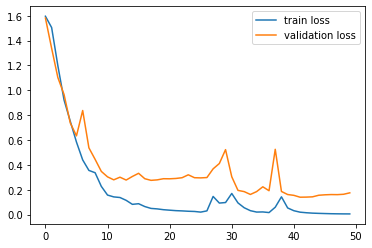

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()

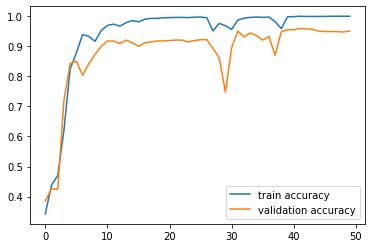

In [18]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()